# Najma Warsame
# Final Project


For my final project i wanted to look into covid-19 cases and differnt variable that might have contibuted to how people died 
and how that correlates. I am going to be doing logistic regression on my data. The data is imbalanced and has more cases of people
being alive then dead from covid which i think could be an issue.

This data set contains the following features:

* 'USMER': Indicates whether the patient treated medical units of the first, second or third level.
* 'MEDICAL_UNIT': type of institution of the National Health System that provided the care.
*  orginal column:'SEX' changed to: 'FEMALE': whether the patient is female or not
* 'INTUBED': whether the patient was intubed or not.
* 'PNEUMONIA': whether the patient has pneumonia or not.
* 'Age': of the patient
* 'PREGNANT': whether the patient is pregnant or not.
* 'DIABETES': whether the patient has diabetes or not.
* 'ASTHMA': whether the patient has asthma or not.
* 'INMSUPR': whether the patient has inmsupr or not.
* 'HIPERTENSION': Whether or not consumer was male
* 'OTHER_DISEASE': whether the patient has other_diseases or not.
* 'CARDIOVASCULAR': whether the patient has cardivasular or not.
* 'OBESITY': whether the patient is obese or not.
* 'DATE_DIED': Date the patient died or if alive 99-99-9999
* 'RENAL_CHRONIC': whether the patient has renal_chronic or not.
* 'TOBACCO': whether the patient is a smoker or not.
* 'ICU': whether the patient was admitted into the ICU.
* orginial column: 'PATIENT_TYPE' changed to:'HOSPITALIZED': type of care the patient received in the unit. 0 for returned
* home and 1 for hospitalization.
* 'DIED': whether the patient Died
* 'HAS_COVID': whether the patient had covid


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the csv file

In [157]:
covid = pd.read_csv("CovidData.csv")

### Use Head, info and describe

In [159]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Dataset has missing data was just put in as an int (97,98,99)

In [161]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [162]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


# Missing data
wrote a functuon to change missing int value data to NA to see how much is missing overall from each column

In [164]:
def cleanColumns(covid, columns): ## Convert all the 97, 99, and 98 to NA to see in describe how much is missing
    for cols in columns:
        covid[cols] = covid[cols].replace(97, pd.NA)
        covid[cols] = covid[cols].replace(99, pd.NA)
        covid[cols] = covid[cols].replace(98, pd.NA)

    return covid 
excludeCols = ['DATA_DIED', 'AGE'] ## Excluded these columns dont have any missing
col = [col for col in covid.columns if col not in excludeCols]

covid = cleanColumns(covid, col)

Change dataset to binary by converting all the 2 to 0 and 

In [166]:
def turnBinary(covid, columns): ## Function replaces 2 to 0 to make dataset binary
    for cols in columns:
        covid[cols] = covid[cols].replace(2, 0)

    return covid 
excludeCols = ['USMER', 'DATE_DIED','AGE', 'MEDICAL_UNIT','PATIENT_TYPE','CLASIFFICATION_FINAL']
col = [col for col in covid.columns if col not in excludeCols]

covid = turnBinary(covid, col)

rename sex to female female = 1 male = 0

In [168]:
covid = covid.rename(columns={'SEX': 'FEMALE'})

New column for hospitalized and 2 is people who are hospitalized thats why its 1 and patients that get sent home are 0

In [170]:
covid['HOSPITALIZED'] = covid['PATIENT_TYPE'].replace({1: 0, 2: 1}) 

drop column made a new binary column

In [172]:
covid.drop('PATIENT_TYPE', axis=1, inplace=True)

Dates in dates died are made to NAT to be easier to replace

In [174]:
covid['DATE_DIED'] = pd.to_datetime(covid['DATE_DIED'],errors='coerce') 

Make binary column for date_dies where they died where NAT is 1 becuase they died any other number is 0 because they survived

In [176]:
covid['DIED'] = covid['DATE_DIED'].notnull().astype(int) 

In [178]:
covid.drop('DATE_DIED', axis=1, inplace=True) # drop column

For the classification_final makes a new column where 1-3 are 1 and the rest are 0 they are the ones that got diagnosed with covid

In [180]:
covid['HAS_COVID'] = covid['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0) 

In [182]:
covid.drop('CLASIFFICATION_FINAL', axis=1, inplace=True) # drop column

## Heatmap shows null values in dataset for each column

<Axes: >

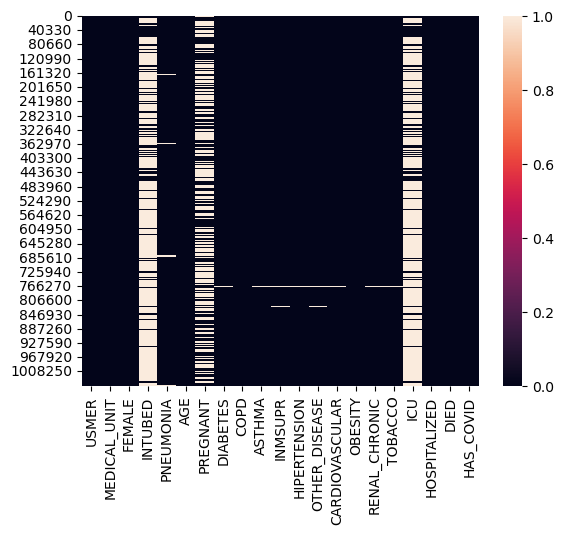

In [184]:
sns.heatmap(covid.isnull())

# Missing DATA

In the pregnant column it showed that mostly for female 0 wich where males were NA I changed it to 0 not pregnant

In [187]:
covid['PREGNANT'] = np.where(covid['FEMALE'] == 0, 0, covid['PREGNANT'])

In [188]:
covid['PREGNANT'].value_counts() # more NA values to fix

PREGNANT
0    1036690
1       8131
Name: count, dtype: int64

rest of the missing data in pregnant column will be filled in with the mode 

In [190]:
covid['PREGNANT'].fillna(covid['PREGNANT'].mode()[0], inplace=True)

/var/folders/mj/pcvrlyx965z6f8_7d_2xygkh0000gn/T/ipykernel_82909/3969071663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid['PREGNANT'].fillna(covid['PREGNANT'].mode()[0], inplace=True)
/var/folders/mj/pcvrlyx965z6f8_7d_2xygkh0000gn/T/ipykernel_82909/3969071663.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [191]:
covid['PREGNANT'] = covid['PREGNANT'].astype(int) # values is a double changed to int

Fill in missing colums with the mode for columns that have a dtype object 

In [193]:
for column in covid.columns:
    if covid[column].dtype == 'object':
        covid[column].fillna(covid[column].mode()[0], inplace=True)
        covid[column] = covid[column].astype(int)


/var/folders/mj/pcvrlyx965z6f8_7d_2xygkh0000gn/T/ipykernel_82909/522509212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid[column].fillna(covid[column].mode()[0], inplace=True)
/var/folders/mj/pcvrlyx965z6f8_7d_2xygkh0000gn/T/ipykernel_82909/522509212.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


# Count plot of Column Died 

<Axes: xlabel='DIED', ylabel='count'>

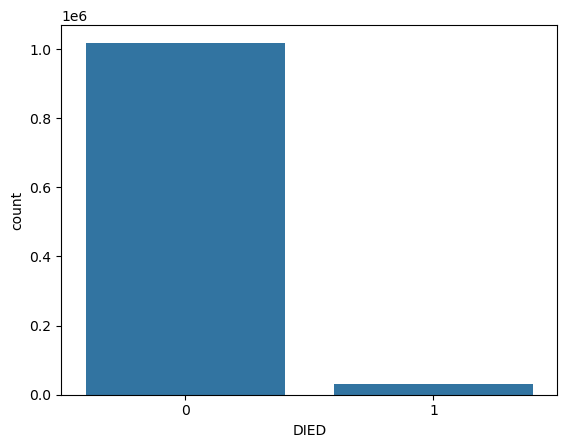

In [195]:
sns.countplot(x='DIED', data=covid) # shows that the data is imbalanced 

In [196]:
covid.info() # checking all the values are there and dtype is all int instead of object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   USMER           1048575 non-null  int64
 1   MEDICAL_UNIT    1048575 non-null  int64
 2   FEMALE          1048575 non-null  int64
 3   INTUBED         1048575 non-null  int64
 4   PNEUMONIA       1048575 non-null  int64
 5   AGE             1048575 non-null  int64
 6   PREGNANT        1048575 non-null  int64
 7   DIABETES        1048575 non-null  int64
 8   COPD            1048575 non-null  int64
 9   ASTHMA          1048575 non-null  int64
 10  INMSUPR         1048575 non-null  int64
 11  HIPERTENSION    1048575 non-null  int64
 12  OTHER_DISEASE   1048575 non-null  int64
 13  CARDIOVASCULAR  1048575 non-null  int64
 14  OBESITY         1048575 non-null  int64
 15  RENAL_CHRONIC   1048575 non-null  int64
 16  TOBACCO         1048575 non-null  int64
 17  ICU             1048575 non

In [197]:
covid.drop('USMER', axis=1, inplace=True) # drop bc not explained well on the web and dont need it

In [198]:
covid.drop('MEDICAL_UNIT', axis=1, inplace=True) # drop bc dont think i need it not as important as other columns

# Graphs

<Axes: xlabel='AGE', ylabel='DIED'>

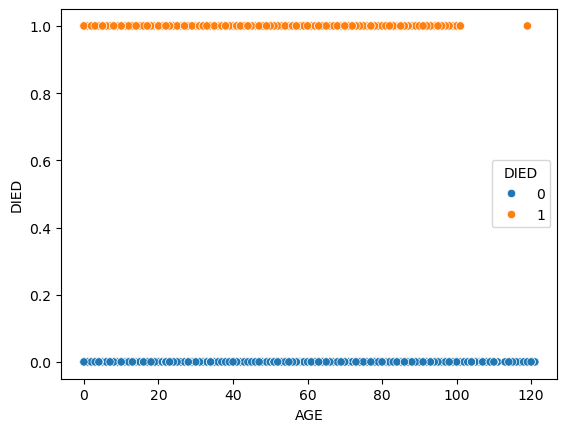

In [200]:
sns.scatterplot(x='AGE', y= 'DIED', hue= 'DIED', data=covid) 
# very large dataset not really seeing correlation looks like all ages died from covid 

In [201]:
##sns.pairplot(covid,hue='DIED') 
# tried doing this wont work bc large dataset and 
# when i run it the next cell wont work and have to refresh and close terminal to restart 

<Axes: xlabel='DIED', ylabel='AGE'>

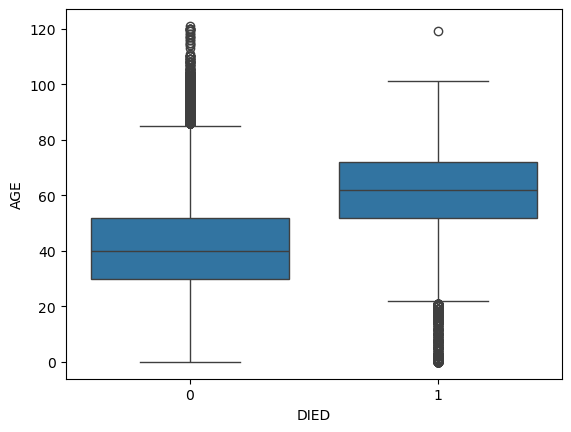

In [202]:
sns.boxplot(x='DIED', y='AGE', data=covid) 
# Mostly the median age is over 60 the outlier is younger people less than 30 and a 121
# what i see id that the people who survived were mostly younger and the outliers where older people

In [203]:
covid[covid['DIED'] == 0]['AGE'].max()

121

<Axes: xlabel='AGE', ylabel='Count'>

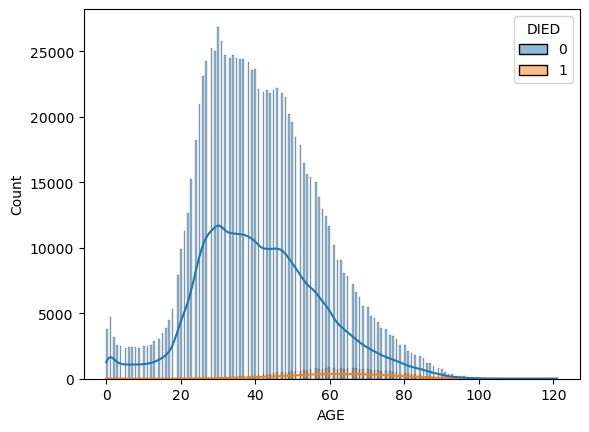

In [204]:
sns.histplot(data=covid, x='AGE', hue='DIED', kde=True)

<Axes: >

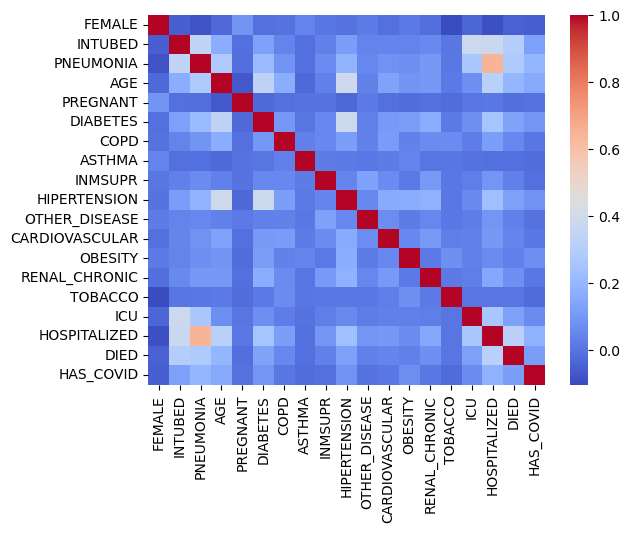

In [205]:
covid_corr = covid.corr()
sns.heatmap(covid_corr, cmap='coolwarm') 
# shows that hospitalized and pneumonia are correlated

# Logistic Regression 

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
covid.columns

Index(['FEMALE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'HOSPITALIZED', 'DIED',
       'HAS_COVID'],
      dtype='object')

In [262]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   FEMALE          1048575 non-null  int64
 1   INTUBED         1048575 non-null  int64
 2   PNEUMONIA       1048575 non-null  int64
 3   AGE             1048575 non-null  int64
 4   PREGNANT        1048575 non-null  int64
 5   DIABETES        1048575 non-null  int64
 6   COPD            1048575 non-null  int64
 7   ASTHMA          1048575 non-null  int64
 8   INMSUPR         1048575 non-null  int64
 9   HIPERTENSION    1048575 non-null  int64
 10  OTHER_DISEASE   1048575 non-null  int64
 11  CARDIOVASCULAR  1048575 non-null  int64
 12  OBESITY         1048575 non-null  int64
 13  RENAL_CHRONIC   1048575 non-null  int64
 14  TOBACCO         1048575 non-null  int64
 15  ICU             1048575 non-null  int64
 16  HOSPITALIZED    1048575 non-null  int64
 17  DIED            1048575 non

In [266]:
y=covid['DIED']
X= covid.drop(['DIED'],axis=1)

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [274]:
from sklearn.linear_model import LogisticRegression

In [276]:
logM = LogisticRegression()

In [278]:
logM.fit(X_train, y_train)

LogisticRegression()

In [280]:
prediction = logM.predict(X_test)

In [284]:
from sklearn.metrics import classification_report

In [286]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    407296
           1       0.38      0.03      0.06     12134

    accuracy                           0.97    419430
   macro avg       0.68      0.52      0.52    419430
weighted avg       0.95      0.97      0.96    419430



for precision for the people who survied it returned 97% and recall returned 100% and f1-score returned 99% 
for people who died precision returned 38%, recall returned 3% and f1-score returned 6%.
The model preformed poorly on predicting deaths and has a high prediciton for people who survived bc the dataset is 
imbalanced. 

In [414]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=10) # 200, 25

In [416]:
logN = LogisticRegression()

In [418]:
logN.fit(X_train, y_train)

LogisticRegression()

In [420]:
prediction = logN.predict(X_test)

In [422]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    407304
           1       0.39      0.03      0.06     12126

    accuracy                           0.97    419430
   macro avg       0.68      0.51      0.52    419430
weighted avg       0.96      0.97      0.96    419430



for people who died precision returned 39%, recall returned 3% and f1-score returned 6%.
i tried to adjust the random seed multiple time but kept getting poor result which shows the dataset is imbalanced
and predicts inaccuratly people who survived as died. The model is biased and is predicting only survived bc its the majority in the dataset
and since there are less people in the dataset that died they are getting inaccuralty predicted and the model performse poorly